In [1]:
!pip install skimpy
!pip install summarytools

# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [2]:
from skimpy import skim
from summarytools import dfSummary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Data

In [3]:
df = pd.read_csv('Traffic_Accidents.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [4]:
df.head()

Unnamed: 0 Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
0       88245       2.01E+12               381880.0                298700.0   
1       78422  200520D303703               413520.0                284740.0   
2       19574  200501TX20137               516260.0                177370.0   
3       79337  200520E097001               401530.0                282610.0   
4       89121       2.01E+12               421760.0                320680.0   

   Longitude   Latitude  Police_Force  Accident_Severity  Number_of_Vehicles  \
0  -2.268891  52.585773            21                  3                 2.0   
1  -1.802453  52.460412            20                  2                 1.0   
2  -0.327073  51.483290             1                  3                 2.0   
3  -1.978930  52.441426            20                  3                 2.0   
4  -1.678823  52.783240            21                  3                 1.0   

   Number_of_Casualties  ... 2nd_Road_Number  \
0                     2  ...             0.0   
1                     1  ...             0.0   
2                     2  ...           454.0   
3                     1  ...             0.0   
4                     1  ...             0.0   

   Pedestrian_Crossing-Human_Control  \
0              None within 50 metres   
1              None within 50 metres   
2              None within 50 metres   
3              None within 50 metres   
4              None within 50 metres   

       Pedestrian_Crossing-Physical_Facilities  \
0        No physical crossing within 50 meters   
1        No physical crossing within 50 meters   
2  Pedestrian phase at traffic signal junction   
3        No physical crossing within 50 meters   
4        No physical crossing within 50 meters   

                          Light_Conditions       Weather_Conditions  \
0           Daylight: Street light present  Fine without high winds   
1           Daylight: Street light present  Fine without high winds   
2           Daylight: Street light present  Fine without high winds   
3  Darkness: Street lights present and lit  Fine without high winds   
4  Darkness: Street lights present and lit  Fine without high winds   

   Road_Surface_Conditions  Urban_or_Rural_Area  \
0                      Dry                  2.0   
1                      Dry                  1.0   
2                      Dry                  1.0   
3                      Dry                  1.0   
4                      Dry                  2.0   

  Did_Police_Officer_Attend_Scene_of_Accident  LSOA_of_Accident_Location  \
0                                         Yes                  E01029654   
1                                         Yes                  E01009313   
2                                         Yes                  E01002678   
3                                          No                  E01008924   
4                                         Yes                  E01029416   

     Year  
0  2005.0  
1  2005.0  
2  2005.0  
3  2005.0  
4  2005.0  

[5 rows x 30 columns]

In [5]:
df.tail()

Unnamed: 0 Accident_Index  Location_Easting_OSGR  \
51995       58660  200511DJ27240               427910.0   
51996      101443  20053102C2156               450720.0   
51997         437  200501BS70452               526580.0   
51998       61353       2.01E+12               426800.0   
51999       75359  2005160D02810               509970.0   

       Location_Northing_OSGR  Longitude   Latitude  Police_Force  \
51995                515740.0  -1.570167  54.536179            11   
51996                340010.0  -1.246470  52.955054            31   
51997                177540.0  -0.178465  51.482604             1   
51998                463700.0  -1.591972  54.068547            12   
51999                428420.0  -0.334114  53.740566            16   

       Accident_Severity  Number_of_Vehicles  Number_of_Casualties  ...  \
51995                  3                 2.0                     1  ...   
51996                  3                 1.0                     1  ...   
51997                  3                 1.0                     1  ...   
51998                  3                 2.0                     2  ...   
51999                  3                 2.0                     1  ...   

      2nd_Road_Number  Pedestrian_Crossing-Human_Control  \
51995            55.0              None within 50 metres   
51996          6002.0              None within 50 metres   
51997             0.0              None within 50 metres   
51998             0.0              None within 50 metres   
51999             0.0              None within 50 metres   

           Pedestrian_Crossing-Physical_Facilities  \
51995        No physical crossing within 50 meters   
51996  Pedestrian phase at traffic signal junction   
51997                               Zebra crossing   
51998        No physical crossing within 50 meters   
51999        No physical crossing within 50 meters   

                     Light_Conditions          Weather_Conditions  \
51995  Daylight: Street light present     Fine without high winds   
51996  Daylight: Street light present     Fine without high winds   
51997  Daylight: Street light present  Raining without high winds   
51998   Darkeness: No street lighting     Fine without high winds   
51999  Daylight: Street light present     Fine without high winds   

       Road_Surface_Conditions  Urban_or_Rural_Area  \
51995                      Dry                  1.0   
51996                      Dry                  1.0   
51997                 Wet/Damp                  1.0   
51998                      Dry                  2.0   
51999                      Dry                  1.0   

      Did_Police_Officer_Attend_Scene_of_Accident  LSOA_of_Accident_Location  \
51995                                         Yes                  E01012363   
51996                                         Yes                  E01028141   
51997                                         Yes                  E01002840   
51998                                         Yes                  E01027681   
51999                                         Yes                  E01012853   

         Year  
51995  2005.0  
51996  2005.0  
51997  2005.0  
51998  2005.0  
51999  2005.0  

[5 rows x 30 columns]

In [6]:
df.sample(5)

Unnamed: 0 Accident_Index  Location_Easting_OSGR  \
43530       11910  200501MM71285               533390.0   
44320       19038  200501TW60070               516200.0   
17844       67063       2.01E+12               445990.0   
45457       16527  200501SX20099               528050.0   
33221       47005  200506P923855               385220.0   

       Location_Northing_OSGR  Longitude   Latitude  Police_Force  \
43530                179380.0  -0.079753  51.497576             1   
44320                171910.0  -0.329729  51.434228             1   
17844                420740.0  -1.305186  53.681098            13   
45457                196210.0  -0.150509  51.650058             1   
33221                414710.0  -2.224971  53.628702             6   

       Accident_Severity  Number_of_Vehicles  Number_of_Casualties  ...  \
43530                  3                 NaN                     1  ...   
44320                  3                 2.0                     1  ...   
17844                  3                 2.0                     1  ...   
45457                  3                 2.0                     1  ...   
33221                  3                 1.0                     1  ...   

      2nd_Road_Number  Pedestrian_Crossing-Human_Control  \
43530           202.0              None within 50 metres   
44320             0.0              None within 50 metres   
17844             0.0              None within 50 metres   
45457             0.0              None within 50 metres   
33221             0.0              None within 50 metres   

      Pedestrian_Crossing-Physical_Facilities  \
43530   No physical crossing within 50 meters   
44320   No physical crossing within 50 meters   
17844   No physical crossing within 50 meters   
45457   No physical crossing within 50 meters   
33221   No physical crossing within 50 meters   

                              Light_Conditions       Weather_Conditions  \
43530  Darkness: Street lights present and lit  Fine without high winds   
44320  Darkness: Street lights present and lit  Fine without high winds   
17844           Daylight: Street light present  Fine without high winds   
45457  Darkness: Street lights present and lit  Fine without high winds   
33221           Daylight: Street light present  Fine without high winds   

       Road_Surface_Conditions  Urban_or_Rural_Area  \
43530                      Dry                  1.0   
44320                      Dry                  1.0   
17844                 Wet/Damp                  1.0   
45457                      Dry                  1.0   
33221                      Dry                  1.0   

      Did_Police_Officer_Attend_Scene_of_Accident  LSOA_of_Accident_Location  \
43530                                         Yes                  E01003976   
44320                                         Yes                  E01003881   
17844                                         Yes                  E01011848   
45457                                          No                  E01001415   
33221                                          No                  E01005571   

         Year  
43530  2005.0  
44320  2005.0  
17844  2005.0  
45457  2005.0  
33221  2005.0  

[5 rows x 30 columns]

In [7]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 52000  │ │ float64     │ 14    │                                                          │
│ │ Number of columns │ 30     │ │ string      │ 12    │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 4     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name         ┃ NA   ┃ NA % ┃ mean   ┃ sd     ┃ p0     ┃ p25    ┃ p50    ┃ p75     ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ Unnamed: 0          │    0 │    0 │  52310 │  30280 │      0 │  25920 │  52290 │   78550 │ 104900 │ ▇▇▇▇▇▇ │  │
│ │ Location_Easting_OS │    0 │    0 │ 439700 │  66710 │ 296800 │ 388100 │ 429500 │  516000 │ 559600 │ ▂▅▇▆▂▇ │  │
│ │ GR                  │      │      │        │        │        │        │        │         │        │        │  │
│ │ Location_Northing_O │    0 │    0 │ 338800 │ 115700 │ 156100 │ 194200 │ 362000 │  416000 │ 656400 │ ▇▅▇▅▂  │  │
│ │ SGR                 │      │      │        │        │        │        │        │         │        │        │  │
│ │ Longitude           │    0 │    0 │ -1.426 │ 0.9755 │ -3.597 │  -2.18 │ -1.553 │ -0.3129 │ 0.3502 │ ▁▅▇▇▂▇ │  │
│ │ Latitude            │    0 │    0 │  52.94 │  1.045 │  51.29 │  51.63 │  53.15 │   53.64 │   55.8 │ ▇▅▇▆▂  │  │
│ │ Police_Force        │    0 │    0 │   11.1 │  9.558 │      1 │      1 │     10 │      20 │     48 │  ▇▃▃▁  │  │
│ │ Accident_Severity   │    0 │    0 │  2.848 │ 0.3909 │      1 │      3 │      3 │       3 │      3 │    ▁ ▇ │  │
│ │ Number_of_Vehicles  │  802 │ 1.54 │  1.843 │ 0.7081 │      1 │      1 │      2 │       2 │     18 │   ▇    │  │
│ │ Number_of_Casualtie │    0 │    0 │  1.359 │ 0.8042 │      1 │      1 │      1 │       1 │     23 │   ▇    │  │
│ │ s                   │      │      │        │        │        │        │        │         │        │        │  │
│ │ Day_of_Week         │  537 │ 1.03 │   4.12 │  1.934 │      1 │      2 │      4 │       6 │      7 │ ▃▃▃▃▃▇ │  │
│ │ Local_Authority_(Di │    1 │    0 │  155.1 │  114.2 │      1 │     32 │    142 │     254 │    570 │  ▇▅▅▅  │  │
│ │ strict)             │      │      │        │        │        │        │        │         │        │        │  │
│ │ 1st_Road_Class      │    1 │    0 │  4.084 │  1.415 │      1 │      3 │      3 │       6 │      6 │ ▁ ▇▂▂▅ │  │
│ │ 1st_Road_Number     │    1 │    0 │   1026 │   1883 │      0 │      0 │     74 │     642 │   9999 │  ▇  ▁  │  │
│ │ Speed_limit         │ 1041 │    2 │  36.77 │  12.71 │     20 │     30 │     30 │      40 │     70 │  ▇▁ ▁▁ │  │
│ │ 2nd_Road_Class      │    1 │    0 │  2.933 │  3.139 │     -1 │     -1 │      4 │       6 │      6 │ ▆  ▂▁▇ │  │
│ │ 2nd_Road_Number     │    1 │    0 │  340.9 │   1206 │     -1 │      0 │      0 │       0 │   9711 │   ▇    │  │
│ │ Urban_or_Rural_Area │    1 │    0 │   1.25 │  0.433 │      1 │      1 │      1 │       1 │      3 │  ▇  ▃  │  │
│ │ Year                │    1 │    0 │   2005 │      0 

In [8]:
dfSummary(df)

In [9]:
df['Accident_Index'].value_counts()

Accident_Index
2.01E+12         13022
200520G026802        1
200506P025749        1
200532C000405        1
200501TX20059        1
                 ...  
20053102A1000        1
200501QK50403        1
200501QA10185        1
200522EC31149        1
2005160D02810        1
Name: count, Length: 38979, dtype: int64

In [10]:
df = df.drop(columns=['Accident_Index', 'Unnamed: 0', 'Year'], axis=1)

There are different datatypes, no duplicates, a lot of nulls,there are some columns that needs to be dropped. the numerical features needs scalling because they vary. We can extract some new featurs from other features. A lot of categorical featurs needs to be encoded.

## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

In [11]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
cat_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(exclude='object').columns

In [12]:
num_imputer = IterativeImputer(random_state=0)
df[num_cols] = num_imputer.fit_transform(df[num_cols])

In [13]:
from sklearn.impute import SimpleImputer
cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

<Axes: >

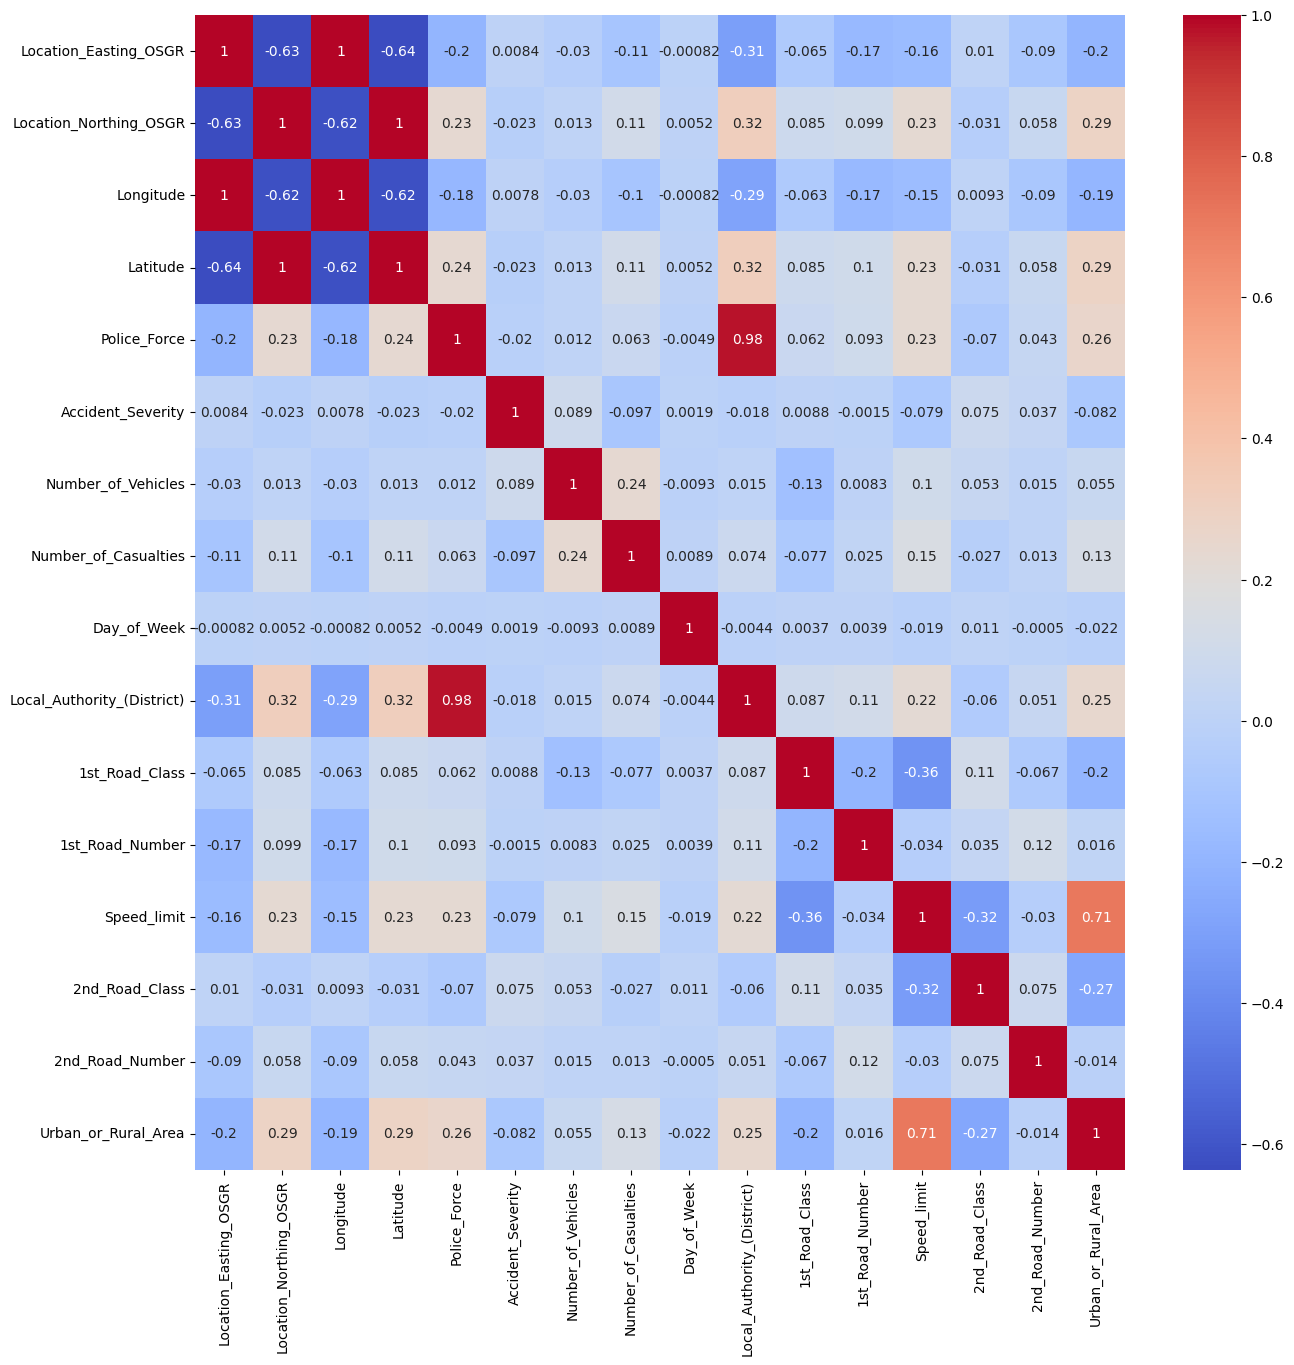

In [17]:
plt.figure(figsize=(15, 15))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')

In [18]:
dfSummary(df)

In [19]:
df['Time'] = df['Time'].str.replace(':', '')
df['Time'] = df['Time'].astype(int)

In [20]:
df = pd.get_dummies(df, columns=['Did_Police_Officer_Attend_Scene_of_Accident'])

In [21]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

/tmp/ipykernel_15131/2514535575.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [22]:
df = df.drop(columns=['Date'], axis=1)

In [23]:
cat_cols = df.select_dtypes(include='object').columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

<Axes: >

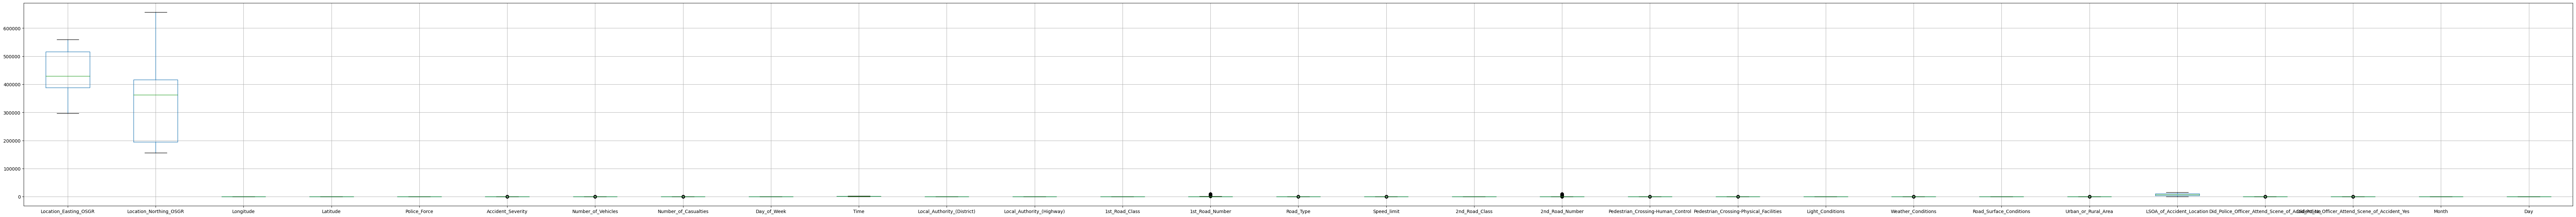

In [24]:
df.boxplot(figsize=(100,8))

In [25]:
def remove_outliers(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3-Q1
  lower_bound = Q1-1.5*IQR
  upper_bound = Q3+1.5*IQR
  return df[(df[column]>=lower_bound) & (df[column]<=upper_bound)]
df = remove_outliers(df, 'Number_of_Casualties')
df = remove_outliers(df, 'Number_of_Vehicles')
df = remove_outliers(df, 'Speed_limit')
df = remove_outliers(df, '1st_Road_Number')
df = remove_outliers(df, 'Road_Type')
df = remove_outliers(df, 'Speed_limit')
df = remove_outliers(df, '2nd_Road_Number')
df = remove_outliers(df, 'Pedestrian_Crossing-Human_Control')
df = remove_outliers(df, 'Pedestrian_Crossing-Physical_Facilities')
df = remove_outliers(df, 'Urban_or_Rural_Area')
df = remove_outliers(df, 'Weather_Conditions')

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
df = pd.DataFrame(scaled_data, columns=df.columns)

<Axes: >

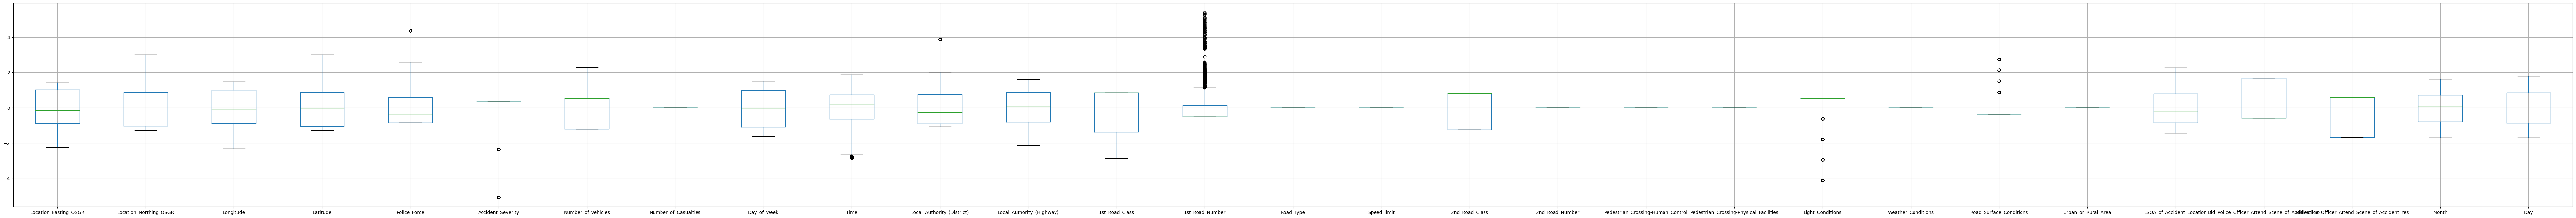

In [27]:
df.boxplot(figsize=(100,8))

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

<Axes: xlabel='PC1', ylabel='PC2'>

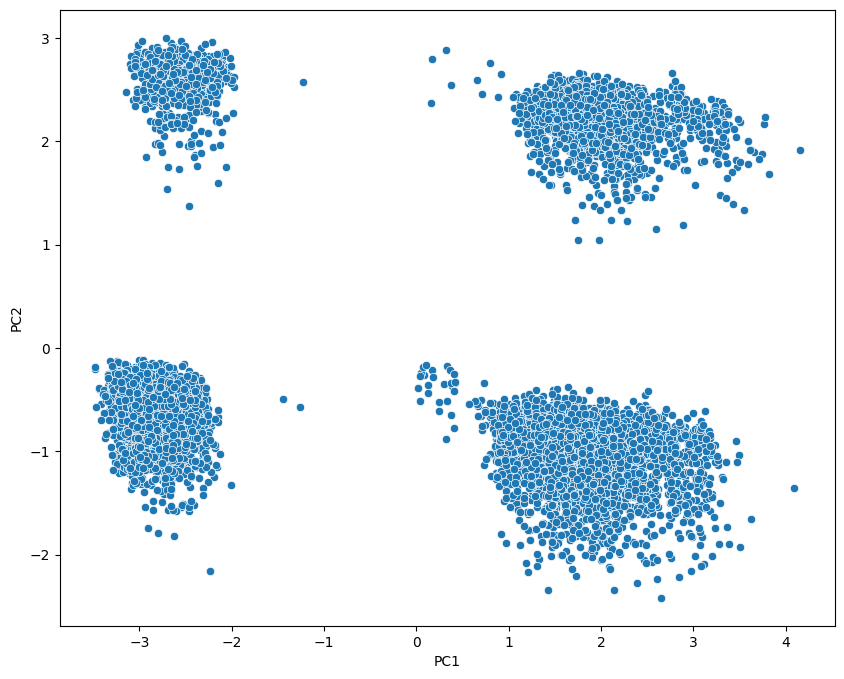

In [29]:
#visualise pca heatmap
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', data=principal_df)

## Feature Selection
Select relevant features for clustering. Explain your choice of features.


<Axes: >

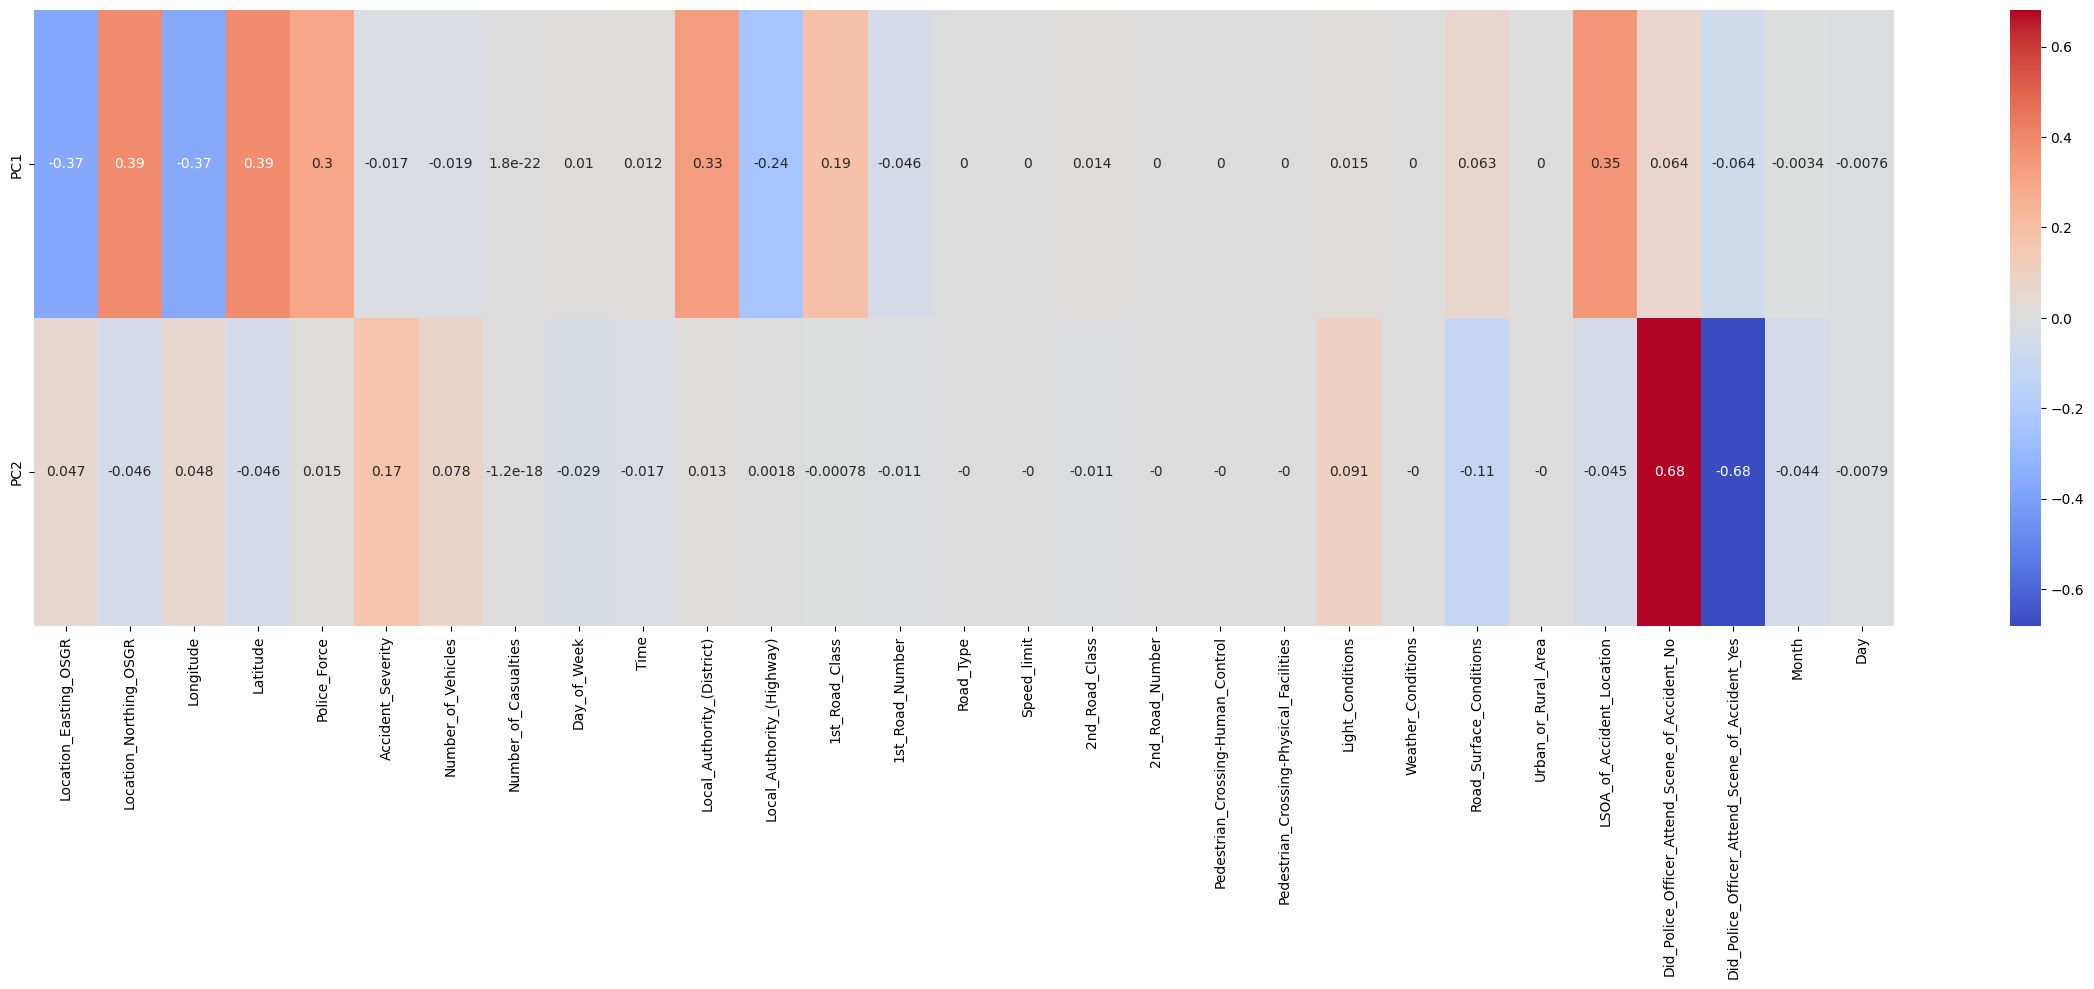

In [52]:
pca_features = pd.DataFrame(pca.components_, columns=df.columns, index=['PC1', 'PC2'])
plt.figure(figsize=(30, 8))
sns.heatmap(pca_features, annot=True, cmap='coolwarm')

## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

<Axes: xlabel='Longitude', ylabel='Latitude'>

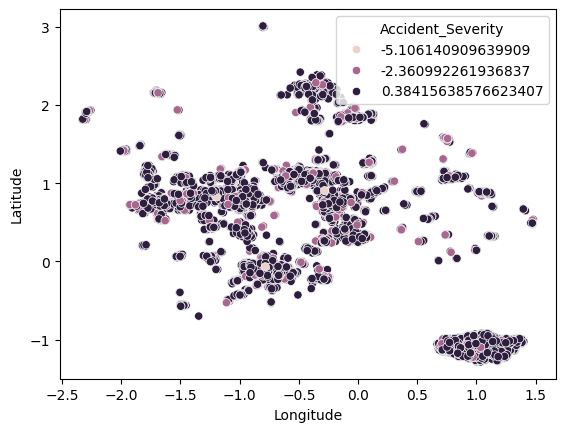

In [31]:
sns.scatterplot(x='Longitude', y='Latitude', data=df, hue='Accident_Severity')

In [33]:
sns.pairplot(df)

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

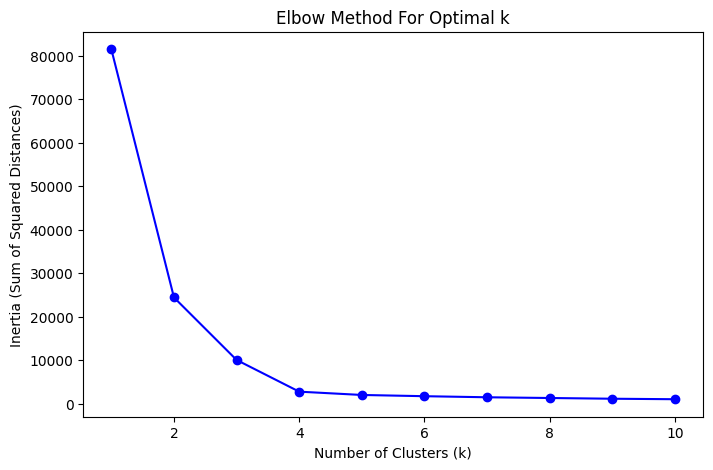

In [35]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def plot_elbow_method(data, max_clusters=10):
    inertia = []

    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)

    plt.figure(figsize=(8, 5))
    plt.plot(range(1, max_clusters + 1), inertia, 'bo-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia (Sum of Squared Distances)')
    plt.title('Elbow Method For Optimal k')
    plt.show()

plot_elbow_method(principal_df, max_clusters=10)

In [37]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(principal_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [38]:
labels = kmeans.labels_

## Evaluation
Evaluate the clustering result using appropriate metrics.


In [39]:
silhouette_avg = silhouette_score(principal_df, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.7580929240251136


## Plot the data points with their predicted cluster center

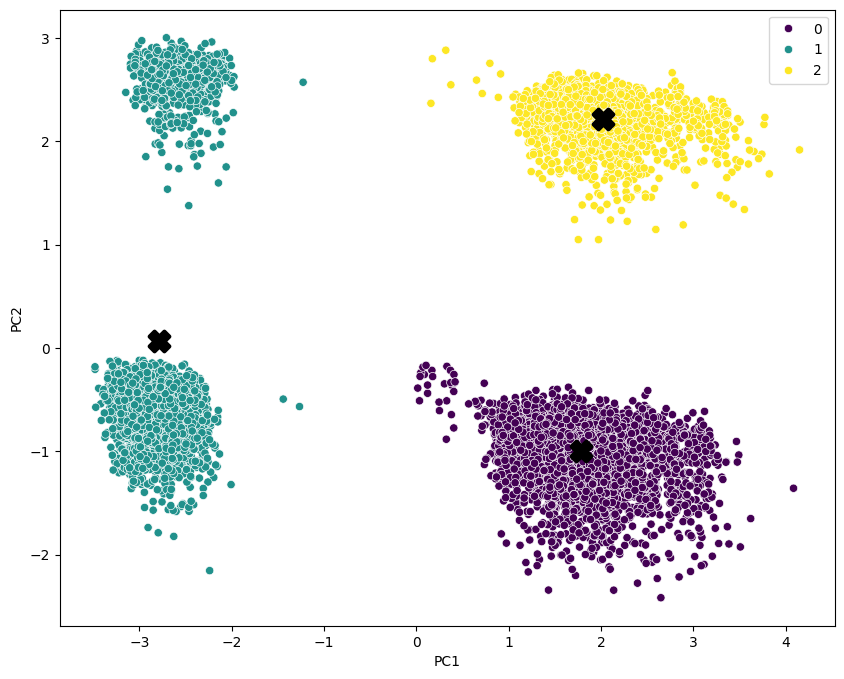

In [42]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', data=principal_df, hue=labels, palette='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, linewidths=3, color='black')

In [43]:
kmeans2 = KMeans(n_clusters=4, random_state=42)
kmeans2.fit(principal_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=42)

In [44]:
labels2 = kmeans2.labels_

In [45]:
silhouette_avg2 = silhouette_score(principal_df, kmeans2.labels_)
print("Silhouette Score:", silhouette_avg2)

Silhouette Score: 0.8200298509174754


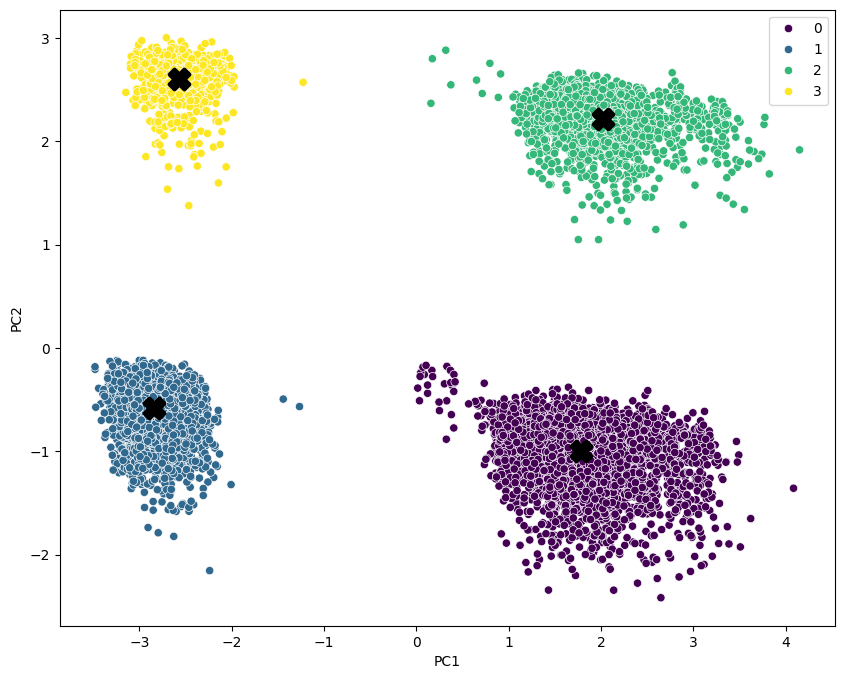

In [47]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', data=principal_df, hue=labels2, palette='viridis')
plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1], marker='X', s=200, linewidths=3, color='black')

## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?

Q1) I chose the features using PCA

Q2) I tried 3 because of the elbow method, but after visulising the clusters I analysed that 4 is better. I tried 4 clusters and the Silhouette score was better.

Q3)


*  Silhouette Score since it is the best for k-means clustering evaluation.
*   It calculates the distance between the clusters and how much the clusters are clustering.



Q4) I can perform DBSCAN and see the evaluation and compare